# Question 1
Given some sample data, write a program to answer the following: click here to
access the required data set
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one
model of shoe. We want to do some analysis of the average order value (AOV). When
we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13.
Given that we know these shops are selling sneakers, a relatively affordable item,
something seems wrong with our analysis.

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Firstly, data must be visualised from the '2019 Winter Data Science Intern Challenge Data Set.csv' file. Respective packages are also installed to perform visualisations. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,13/03/2017 12:36
1,2,92,925,90,1,cash,03/03/2017 17:38
2,3,44,861,144,1,cash,14/03/2017 04:23
3,4,18,935,156,1,credit_card,26/03/2017 12:43
4,5,18,883,156,1,credit_card,01/03/2017 04:35


In [2]:
df[['order_amount','total_items']].mean()

order_amount    3145.1280
total_items        8.7872
dtype: float64

In [3]:
df[['order_amount','total_items']].std()

order_amount    41282.539349
total_items       116.320320
dtype: float64

It is observed that the AOV is a mean of the order_amount which is £3145.128. Interestingly the mean of total_items indicate that an average of 8 shoes are purchased per order. This is relatively inflated given 8 shoes per purchase as an average is very high given most people purchase 1 or 2 shoes. Another thing that could be affecting the high AOV is the individual shoe price each store sells. This is investigated and visualised alongside the total_items feature.

In [4]:
#df_shoe is individual shoe pricing data for each shop
df_shoe = df.groupby(['shop_id']).sum()
df_shoe = df_shoe.reset_index()
df_shoe['shoe_price']= df_shoe['order_amount']/df_shoe['total_items']
df_shoe = df_shoe.filter(['shop_id', 'shoe_price'], axis = 1)
df_shoe.head()

,shop_id,shoe_price
0,1,158.0
1,2,94.0
2,3,148.0
3,4,128.0
4,5,142.0


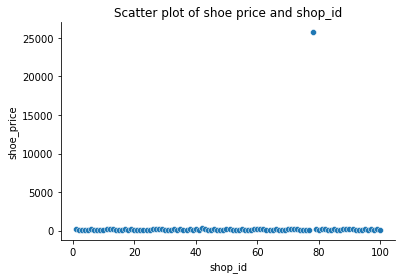

In [5]:
sns.scatterplot(data=df_shoe, x='shop_id', y='shoe_price').set(
    title='Scatter plot of shoe price and shop_id')
sns.despine()

In [6]:
max_shoe = df_shoe[df_shoe['shoe_price'] > 5000]
max_shoe

,shop_id,shoe_price
77,78,25725.0


You can see in the above scatter plot there is an shop that has an unsually high shoe price. This is specifically confirmed in the table below that shop_id 78 has an individual shoe price of £25725.0 which is extortionate. 

In [7]:
#add shoe_price feature to original df
df['shoe_price'] = df['order_amount']/df['total_items']

df_78 = df[df['shop_id'] == 78]
df_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
160,161,78,990,25725,1,credit_card,12/03/2017 05:56,25725.0
490,491,78,936,51450,2,debit,26/03/2017 17:08,25725.0
493,494,78,983,51450,2,cash,16/03/2017 21:39,25725.0
511,512,78,967,51450,2,cash,09/03/2017 07:23,25725.0
617,618,78,760,51450,2,cash,18/03/2017 11:18,25725.0
691,692,78,878,154350,6,debit,27/03/2017 22:51,25725.0
1056,1057,78,800,25725,1,debit,15/03/2017 10:16,25725.0
1193,1194,78,944,25725,1,debit,16/03/2017 16:38,25725.0
1204,1205,78,970,25725,1,credit_card,17/03/2017 22:32,25725.0
1259,1260,78,775,77175,3,credit_card,27/03/2017 09:27,25725.0


Observing all orders by shop_id 78, the shoe price is the same thus there may be potential cause for concern that the shoe price could be decimal error whereby the shoe price is £257.25 instead of £25725. Evidence to this shop selling such an expensive shoe could be potentially found in the shoe sales volme of the store. 

In [8]:
sales_volume = df.groupby(['shop_id']).sum()
sales_volume = sales_volume.reset_index()
sales_volume = sales_volume.filter(['shop_id', 'total_items'], axis = 1)
sales_volume.head()

,shop_id,total_items
0,1,86
1,2,102
2,3,99
3,4,103
4,5,92


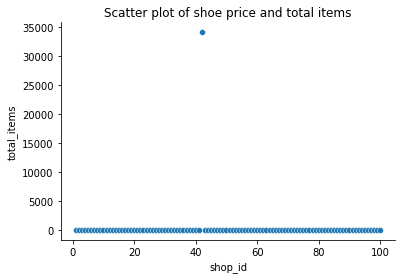

In [9]:
sns.scatterplot(data=sales_volume, x='shop_id', y='total_items').set(
    title='Scatter plot of shoe price and total items')
sns.despine()

In [10]:
max_vol = sales_volume[sales_volume['total_items'] > 5000]
max_vol

,shop_id,total_items
41,42,34063


You can see in the above scatter plot there is an shop that has an unsually high number of shoes sold. This is specifically confirmed in the table below that shop_id 42 has an individual shoe sales volume of 35000 units (total_items). 

In [11]:
df_42 = df[df['shop_id'] == 42]
df_42.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
15,16,42,607,704000,2000,credit_card,07/03/2017 04:00,352.0
40,41,42,793,352,1,credit_card,24/03/2017 14:15,352.0
60,61,42,607,704000,2000,credit_card,04/03/2017 04:00,352.0
308,309,42,770,352,1,credit_card,11/03/2017 18:14,352.0
409,410,42,904,704,2,credit_card,04/03/2017 14:32,352.0


In [12]:
df_42_high = df[df['total_items'] >100]
df_42_high.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
15,16,42,607,704000,2000,credit_card,07/03/2017 04:00,352.0
60,61,42,607,704000,2000,credit_card,04/03/2017 04:00,352.0
520,521,42,607,704000,2000,credit_card,02/03/2017 04:00,352.0
1104,1105,42,607,704000,2000,credit_card,24/03/2017 04:00,352.0
1362,1363,42,607,704000,2000,credit_card,15/03/2017 04:00,352.0


The sales volume of 42 is unusually high due one user (user_id = 607) who regularly purchases 2000 items which is certainly a big factor to the unexpectedly high mean sales volume within the dataset. This could be a contributor to the skewed means calculated in the dataset.

In [13]:

df_shop = df.groupby(['shop_id']).mean()
df_shop = df_shop.filter(['shop_id', 'order_amount', 'total_items'], axis = 1)
df_shop = df_shop.reset_index()

df_shop.head()

,shop_id,order_amount,total_items
0,1,308.818182,1.954545
1,2,174.327273,1.854545
2,3,305.250000,2.062500
3,4,258.509804,2.019608
4,5,290.311111,2.044444


In [14]:
df_shop['shoe_price']=df_shop['order_amount']/df_shop['total_items']
df_shop = df_shop.rename(columns = {'order_amount': 'order_amount_mean', 'total_items': 'total_items_mean'})
df_shop

,shop_id,order_amount_mean,total_items_mean,shoe_price
0,1,308.818182,1.954545,158.0
1,2,174.327273,1.854545,94.0
2,3,305.250000,2.062500,148.0
3,4,258.509804,2.019608,128.0
4,5,290.311111,2.044444,142.0
...,...,...,...,...
95,96,330.000000,2.156863,153.0
96,97,324.000000,2.000000,162.0
97,98,245.362069,1.844828,133.0
98,99,339.444444,1.740741,195.0


using mean order ammount and mean total items look alot more realistic generally on a store-to-store basis.

In [15]:
df.std()

C:\Users\ekord\AppData\Local\Temp/ipykernel_15580/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


order_id         1443.520003
shop_id            29.006118
user_id            87.798982
order_amount    41282.539349
total_items       116.320320
shoe_price       2441.963725
dtype: float64

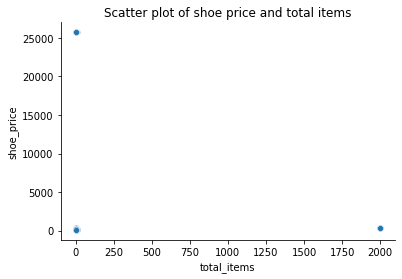

In [16]:
sns.scatterplot(data=df, x='total_items', y='shoe_price').set(
    title='Scatter plot of shoe price and total items')
sns.despine()

In [17]:
df2 = df[ (df['shoe_price'] < 5000) & (df['total_items'] < 500)]


The above scatter plot shows how the extremities in shop 42 and 78 affect the landscape of the data. Using means are not suitable for this dataset as this is heavily affected by extreme values. The best way to evaluate the data is by looking at the data on a store-to-store basis. 

### b. What metric would you report for this dataset?
I would report the median as this is not as severly affected by outliers in the dataset.  

### c. What is its value?


In [18]:
#create variable 'orders' and sort it in ascending order
orders = df['order_amount'].tolist()
orders.sort()

#calculate index of the median value
index = int((len(orders)/2)-1)

#locate median value from calculated index
med = orders[index]

print("median order_amount:", med)

median order_amount: 284


the median order amount is £284.00. This is a much more realsitic value compared to the mean of £3145.13.